In [1]:
import pointCollection as pc
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
import re
import glob
import h5py
%load_ext autoreload
%autoreload 2

In [75]:
maps={}
base='/home/besmith4/nobackup/ATL14_test/'
for sub in ['base_0.1x', 'base', 'base_10x']:
    run_dir=base+sub
    maps[sub]={}
    maps[sub]['z0']=pc.grid.data().from_h5(run_dir+'/z0.h5', group='z0', field_mapping={'z':'z0'})
    maps[sub]['dz']=pc.grid.data().from_h5(run_dir+'/dz.h5', group='dz', field_mapping={'z':'dz'})
    maps[sub]['N']=pc.grid.data().from_h5(run_dir+'/dz.h5', group='dz', field_mapping={'z':'count'})


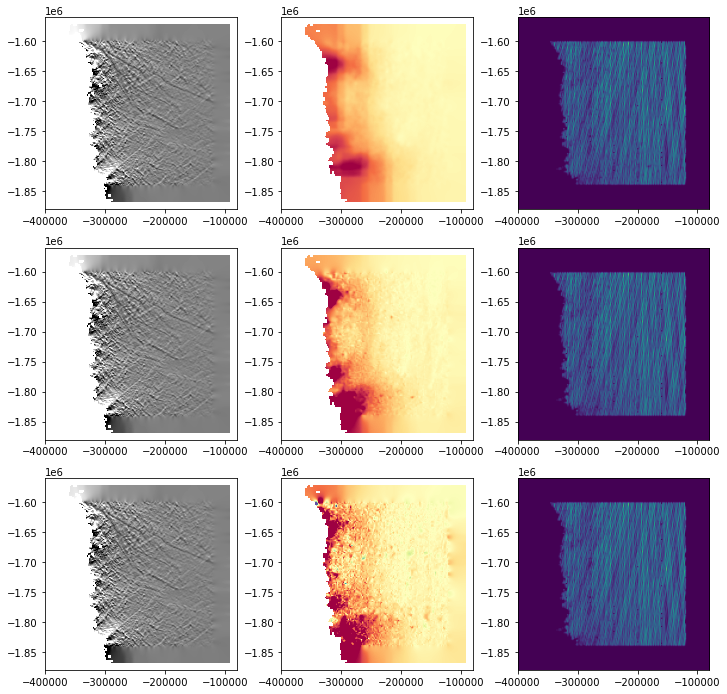

In [76]:
plt.figure(1, figsize=[12, 12]); 
for count, sub in enumerate(['base_0.1x', 'base', 'base_10x']):
    plt.subplot(3,3,3*count+1)
    plt.imshow(np.gradient(maps[sub]['z0'].z[:,:,0])[0], extent=maps[sub]['z0'].extent, vmin=-3, vmax=3,  origin='lower',cmap='gray')
    plt.subplot(3,3,3*count+2)
    plt.imshow(maps[sub]['dz'].z[:,:,4]- maps[sub]['dz'].z[:,:,0], extent=maps[sub]['dz'].extent, vmin=-3, vmax=3,  origin='lower',cmap='Spectral')
    plt.subplot(3, 3,3*count+3)
    plt.imshow(np.nansum(maps[sub]['N'].z, axis=2), extent=maps[sub]['dz'].extent, vmin=0, vmax=500,  origin='lower')

    

<class 'pointCollection.grid.data.data'> with shape (801, 801, 1),
with fields:
['z0']


Text(0.5, 1.0, '$z_0$ (2020)')

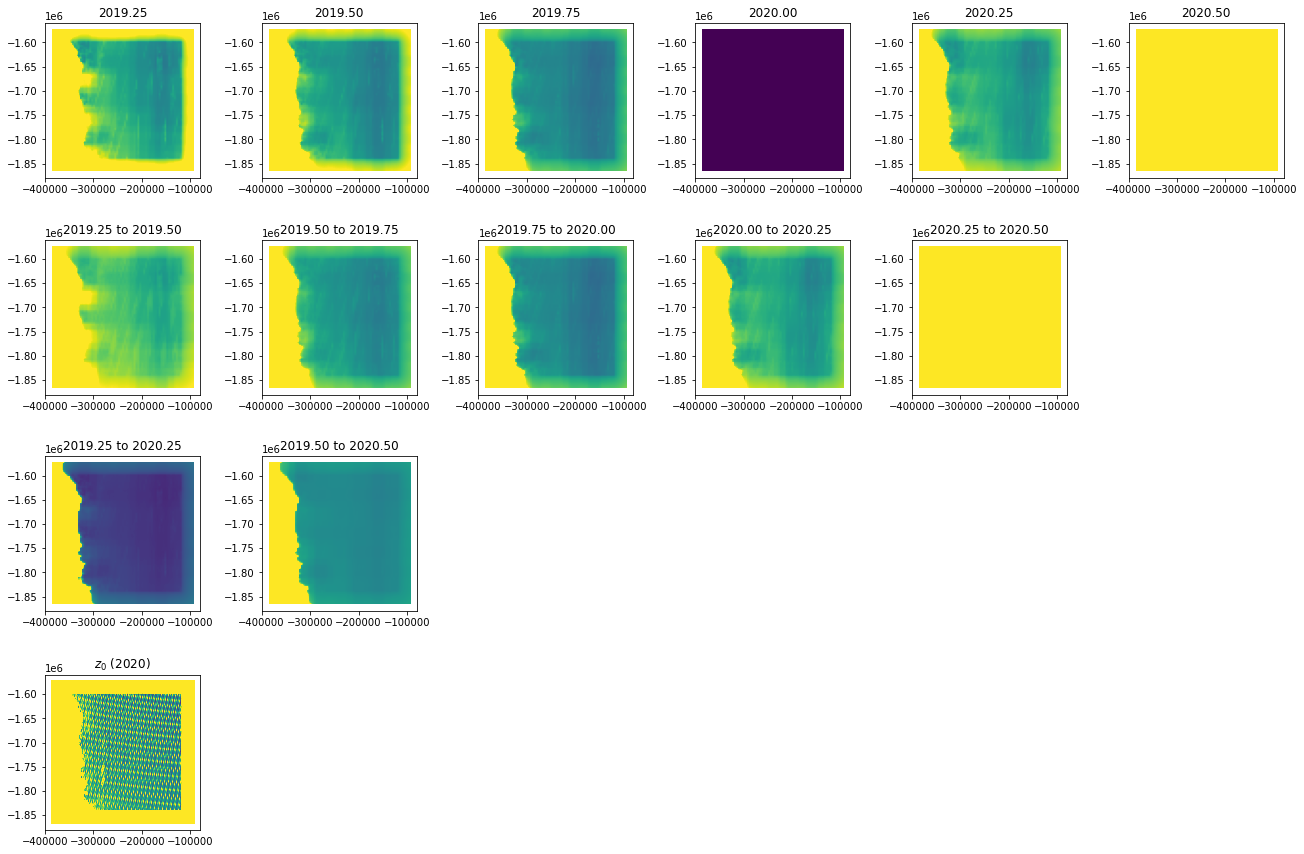

In [77]:
E=pc.grid.data().from_h5('/home/besmith4/nobackup/ATL14_test//base/dz_sigma.h5', group='/dz/sigma' )
E_z0=pc.grid.data().from_h5('/home/besmith4/nobackup/ATL14_test//base/z0_sigma.h5', group='/z0/sigma', field_mapping={'z0':'z0'} )
print(E_z0)

fig, ax=plt.subplots(4,6, constrained_layout=True, figsize=[18,12])
for ii in range(6):
    hi_dz=ax[0,ii].imshow(E.dz[:,:,ii], origin='lower', extent=E.extent, vmin=0, vmax=0.05); #plt.colorbar(label='$\sigma_{dz}$')
    ax[0,ii].set_title('%2.2f' % E.t[ii])
    if ii+1 < E.t.size:
        hi_dz1=ax[1, ii].imshow(E.dzdt_lag1[:,:,ii], origin='lower', extent=E.extent, vmin=0, vmax=0.2); #plt.colorbar(label='$\sigma_{dz/dt}$ lag 1')
        ax[1, ii].set_title('%2.2f to %2.2f' %( E.t[ii], E.t[ii+1]))
    else:
        ax[1,ii].set_visible(False)
    if ii+4 < E.t.size:
        hi_dz4=ax[2, ii].imshow(E.dzdt_lag4[:,:,ii], origin='lower', extent=E.extent, vmin=0, vmax=0.2); #plt.colorbar(label='$\sigma_{dz/dt}$ lag 4')
        ax[2, ii].set_title('%2.2f to %2.2f' %( E.t[ii], E.t[ii+4]))
    else:
        ax[2,ii].set_visible(False)
    if ii > 0:
        ax[3,ii].set_visible(False)
hi_z0=ax[3,0].imshow(E_z0.z0[:,:,0], origin='lower', extent=E_z0.extent, vmin=0, vmax=1)
ax[3, 0].set_title('$z_0$ (2020)')

#plt.tight_layout()
#fig.colorbar(hi_dz, ax=ax[0, :], location='right', shrink=0.6)
#fig.colorbar(hi_dz1, ax=ax[1,0:-1], location='right', shrink=0.6)
#fig.colorbar(hi_dz4, ax=ax[2,0:2], location='right', shrink=0.6)
#fig.colorbar(hi_z0, ax=[ax[3,0]], location='right', shrink=0.6)

#plt.tight_layout() 

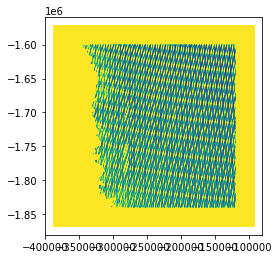

In [61]:
plt.imshow(E_z0.z0[:,:,0], origin='lower', extent=E_z0.extent, vmin=0, vmax=1)


(0.0, 0.05)

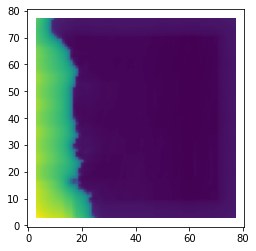

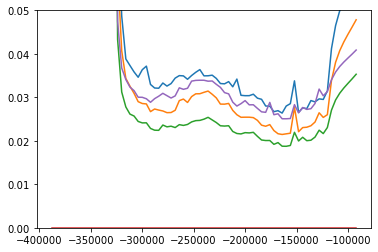

In [39]:
plt.imshow(E.dz[:,:,1], origin='lower')
plt.figure(); plt.plot(E.x, E.dz[20,:, 0:-1])
plt.gca().set_ylim([0, 0.05])

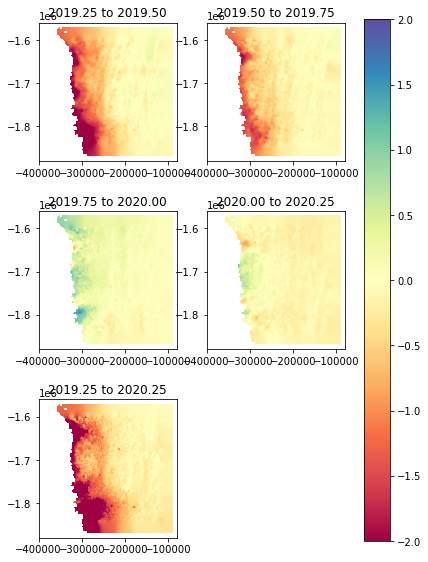

In [8]:
clim=2*np.array([-1, 1])
n_cols=np.ceil(np.sqrt(dz.shape[2]-2)).astype(int)
n_rows=np.ceil((dz.shape[2]-2)/n_cols).astype(int)+1
fig=plt.figure(2, figsize=[6, 8]); plt.clf()
h_im=[]
#h_ax=[]
fig, h_ax = plt.subplots(n_rows, n_cols, num=2)
for tslice in range(dz.shape[2]-2):
    axn=np.unravel_index(tslice, h_ax.shape)
    ax=h_ax[axn]
    #h_ax.append(fig.add_subplot(n_rows, n_cols, tslice+1))
    h_im.append(ax.imshow(dz.z[:,:,tslice+1]-dz.z[:,:,tslice], extent=dz.extent, origin='lower', cmap='Spectral', clim=clim))
    ax.set_title('%2.2f to %2.2f'% (dz.t[tslice], dz.t[tslice+1]))

axn=np.unravel_index(tslice+1, h_ax.shape)
ax=h_ax[axn]
h_im.append(ax.imshow(dz.z[:,:,tslice+1]-dz.z[:,:,0], extent=dz.extent, origin='lower', cmap='Spectral', clim=clim))
ax.set_title('%2.2f to %2.2f'% (dz.t[0], dz.t[tslice+1]))    

fig.tight_layout()
plt.colorbar(h_im[0], ax=h_ax)
h_ax[-1, -1].set_visible(False)


In [9]:
(z0.y[-1]-z0.y[0])/np.diff(z0.y[0:2])
z0.shape
thefile=glob.glob(run_dir+'/*/E-160*.h5')
print(thefile)

['/home/besmith4/nobackup/ATL14_test/default/centers/E-160_N-1640.h5', '/home/besmith4/nobackup/ATL14_test/default/centers/E-160_N-1720.h5', '/home/besmith4/nobackup/ATL14_test/default/centers/E-160_N-1800.h5', '/home/besmith4/nobackup/ATL14_test/default/edges/E-160_N-1840.h5', '/home/besmith4/nobackup/ATL14_test/default/edges/E-160_N-1680.h5', '/home/besmith4/nobackup/ATL14_test/default/edges/E-160_N-1760.h5', '/home/besmith4/nobackup/ATL14_test/default/edges/E-160_N-1600.h5']


/home/besmith4/nobackup/ATL14_test/default/centers/E-160_N-1800.h5


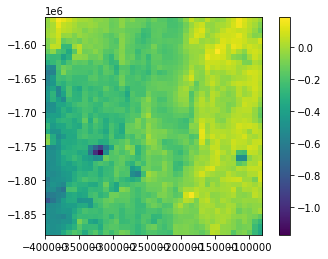

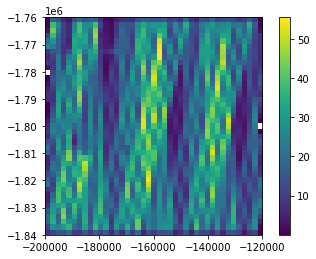

In [23]:
thefile=glob.glob(run_dir+'/*/E-160_N-1800.h5')[0]
print(thefile)
temp=pc.grid.data().from_h5(thefile, group='dz', field_mapping={'z':'dz','count':'count'})
plt.figure();
plt.imshow(temp.z[:,:,3]-temp.z[:,:,0], origin='lower', extent=dz.extent); plt.colorbar()
N=pc.grid.data().from_h5(thefile, group='dz', field_mapping={'z':'count'})
plt.figure();
#plt.imshow(np.sum(N.z>0, axis=2))
plt.imshow(N.z[:,:,-2], extent=N.extent, origin='lower')
plt.colorbar()


#plt.imshow(np.nansum(temp.z>0, axis=2), origin='lower', extent=dz.extent); plt.colorbar()

In [20]:
temp.t

array([2019.25, 2019.5 , 2019.75, 2020.  , 2020.25, 2020.5 ])

In [33]:
temp0=pc.grid.data().from_h5(thefile, group='z0', field_mapping={'z':'z0'})
print(temp0)
print(temp0.x[-1]-temp0.x[0])

<class 'pointCollection.grid.data.data'> with shape (801, 801),
with fields:
['z']
80000.0


<IPython.core.display.Javascript object>


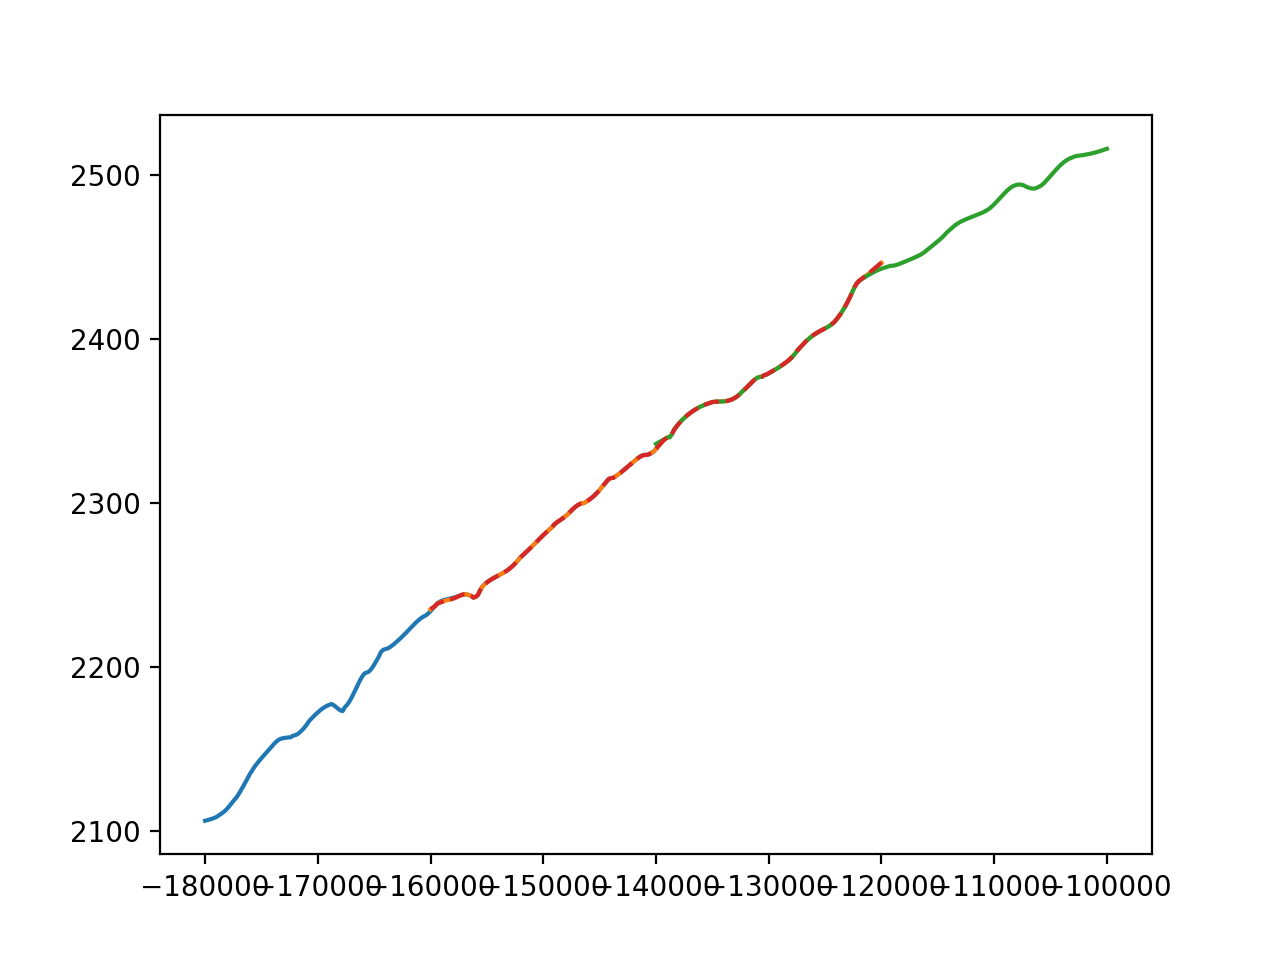

In [96]:
ctr_dir='/Volumes/ice2/ben/ATL14_test/IS2//U07/z03xlooser_dt10xlooser_40km/centers'
edge_dir='/Volumes/ice2/ben/ATL14_test/IS2//U07/z03xlooser_dt10xlooser_40km/edges'

c_files=['E-160_N-1800.h5',  'E-120_N-1800.h5']
fig=plt.figure(4)
fig.clf()
Dc={}
Bc={}
for file in c_files:
    Dc[file]=pc.grid.data().from_h5(ctr_dir+'/'+file, group='dz', field_mapping={'z':'dz'})
    with h5py.File(ctr_dir+'/'+file,'r') as h5f:
        Bc[file]={'rgt':np.array(h5f['/bias/rgt']),
           'cycle':np.array(h5f['/bias/cycle']),
           'val':np.array(h5f['/bias/val'])}
De={}
Be={}
for file in ['E-140_N-1800.h5']:
    De[file]=pc.grid.data().from_h5(edge_dir+'/'+file, group='dz', field_mapping={'z':'dz'})    
    with h5py.File(ctr_dir+'/'+file,'r') as h5f:
        Be[file]={'rgt':np.array(h5f['/bias/rgt']),
           'cycle':np.array(h5f['/bias/cycle']),
           'val':np.array(h5f['/bias/val'])}
    
for file in files:
    plt.plot(Dc[file].x, Dc[file].z[int(np.ceil(Dc[file].shape[0]/2)),:,2])

for file in ['E-140_N-1800.h5']:
    plt.plot(De[file].x, De[file].z[int(np.ceil(De[file].shape[0]/2)),:,2], '--')




In [98]:
fig=plt.figure(5)
fig.clf()
Dc0={}
for file in files:
    Dc0[file]=pc.grid.data().from_h5(ctr_dir+'/'+file, group='z0', field_mapping={'z':'z0'})
    
De0={}
for file in ['E-140_N-1800.h5']:
    De0[file]=pc.grid.data().from_h5(edge_dir+'/'+file, group='z0', field_mapping={'z':'z0'})    
  
for file in files:
    plt.plot(Dc0[file].x, Dc0[file].z[int(np.ceil(Dc0[file].shape[0]/2)),:])

for file in ['E-140_N-1800.h5']:
    plt.plot(De0[file].x, De0[file].z[int(np.ceil(De0[file].shape[0]/2)),:], '--')


In [88]:
len(rgts)

6

<IPython.core.display.Javascript object>


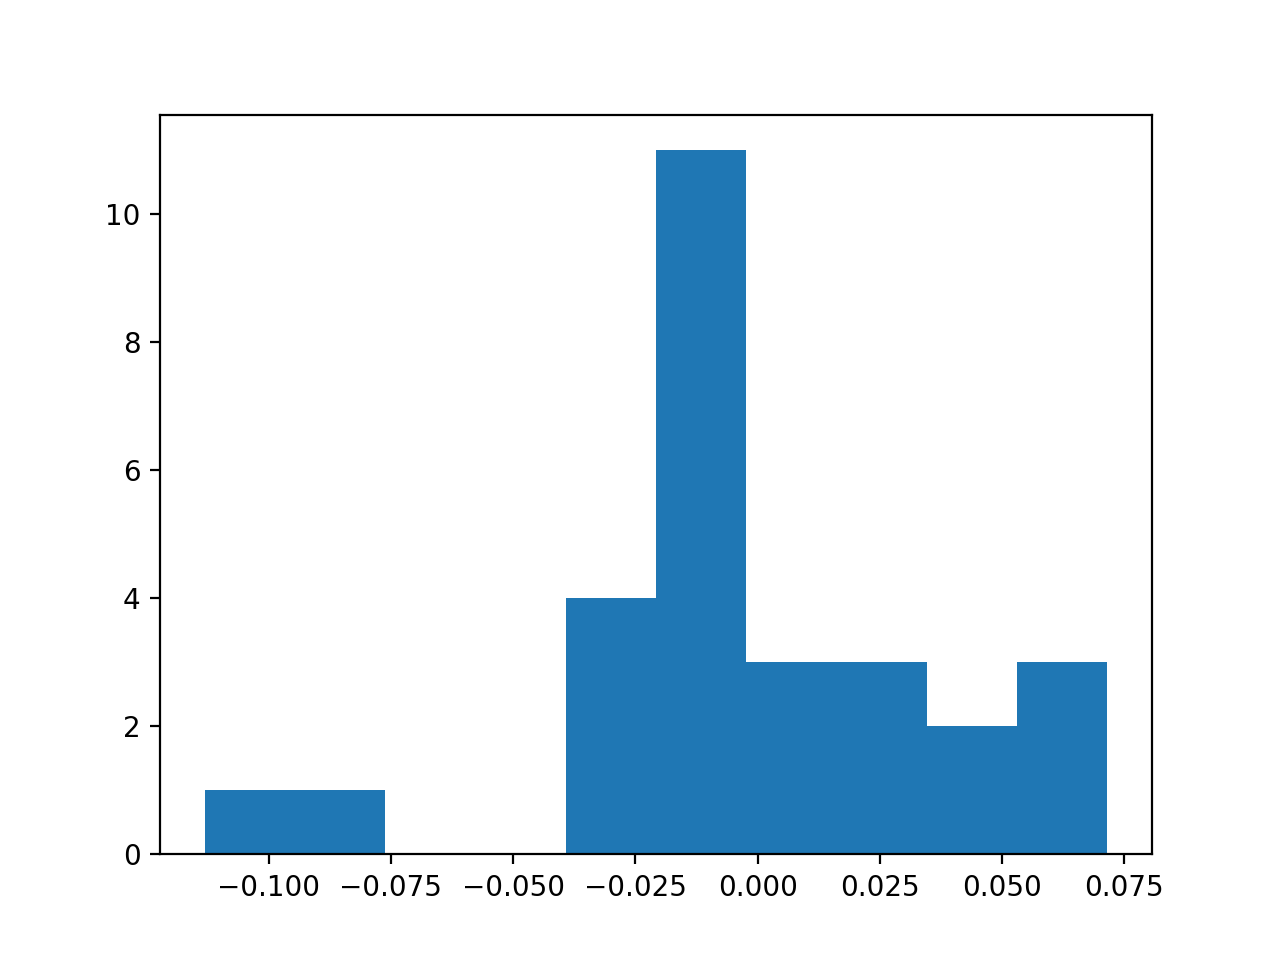

(array([ 1.,  1.,  0.,  0.,  4., 11.,  3.,  3.,  2.,  3.]),
 array([-0.11297002, -0.09453028, -0.07609053, -0.05765079, -0.03921105,
        -0.02077131, -0.00233156,  0.01610818,  0.03454792,  0.05298766,
         0.07142741]),
 <a list of 10 Patch objects>)

In [103]:
rc, ic, ie=np.intersect1d(Bc[files[2]]['rgt']+1j*Bc[files[2]]['cycle'], \
                          Be[files[1]]['rgt']+1j*Be[files[1]]['cycle'], return_indices=True)
fig=plt.figure(6); plt.clf()
plt.hist(Bc[files[2]]['val'][ic]-Be[files[1]]['val'][ie])
